# On Learning Curves

source: [Learning Curves in Linear & Polynomial Regression](https://utkuufuk.com/2018/05/04/learning-curves)

TODO <div class="alert alert-block alert-warning">https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html</div>

### Load Data

historical records on the change in water level and the amount of water flowing out of the dam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio

dataset = sio.loadmat('data/water.mat')
x_train = dataset['X']
x_val = dataset['Xval']
x_test = dataset['Xtest']

# squeeze the target variables into one-dimensional arrays, e.g. (12,1) -> (12,)
y_train = dataset['y'].squeeze()
y_val = dataset['yval'].squeeze()
y_test = dataset['ytest'].squeeze()

#### Plot the Training Sample

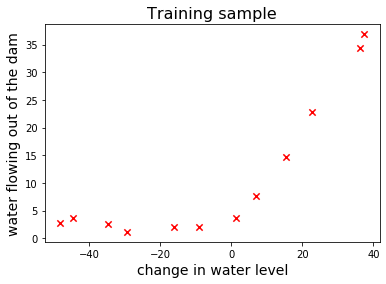

In [2]:
fig1, ax1 = plt.subplots()
ax1.scatter(x_train, y_train, marker='x', s=40, c='red')
plt.xlabel('change in water level', fontsize=14)
plt.ylabel('water flowing out of the dam', fontsize=14)
plt.title('Training sample', fontsize=16);

## Linear Regression

see [Linear Regression Notebook](linear-regression.ipynb) for cost-function and gradient descent.

In [3]:
def cost(theta, X, Y):
    predictions = X @ theta
    return np.sum(np.square(predictions - Y)) / (2 * len(Y))

def cost_gradient(theta, X, Y):
    predictions = X @ theta
    return X.T @ (predictions - Y) / len(Y)

def train_linear_regression(X, Y, alpha = 0.05, num_iters = 2000):
    cost_history = np.zeros(num_iters)
    theta = np.zeros(X.shape[1]).reshape(X.shape[1], 1)
    for n in range(num_iters):
        theta -= alpha * cost_gradient(theta, X, Y)
        cost_history[n] = cost(theta, X, Y)
    return theta, cost_history

def insert_ones(x):
    X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
    X[:, 1:] = x
    return X

In [4]:
X_train = insert_ones(x_train)
Y_train = y_train.reshape(len(y_train), 1)
theta, cost_history = train_linear_regression(X_train, Y_train, 0.0023)

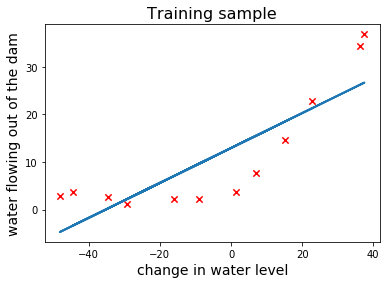

In [5]:
hypothesis = X_train @ theta
ax1.plot(X_train[:, 1], hypothesis, linewidth=2)
fig1

Finding a suitable **learning rate** $\alpha$ is difficult:

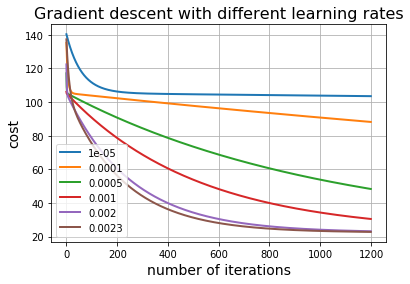

In [6]:
plt.figure()
num_iters = 1200
learning_rates = [0.00001, 0.0001, 0.0005, 0.001, 0.002, 0.0023]
for lr in learning_rates:
    _, cost_history = train_linear_regression(X_train, Y_train, lr, num_iters)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
plt.grid()

### Learning Curves

We start with 2 **training examples** and increase them one by one. 

In each iteration, we’ll train a model and evaluate the **training error** on the existing training sample, and the **validation error** on the whole **validation sample**:

In [7]:
def learning_curves(X_train, Y_train, X_val, Y_val, lr=0.0001):
    train_err = np.zeros(len(Y_train))
    val_err = np.zeros(len(Y_train))
    for i in range(1, len(Y_train)):
        theta, _ = train_linear_regression(X_train[0:i+1, :], Y_train[0:i+1], lr)
        train_err[i] = cost(theta, X_train[0:i+1, :], Y_train[0:i+1])
        val_err[i] = cost(theta, X_val, Y_val)
    
    plt.plot(range(2, len(Y_train) + 1), train_err[1:], c='r', linewidth=2)
    plt.plot(range(2, len(Y_train) + 1), val_err[1:], c='b', linewidth=2)
    plt.xlabel('number of training examples', fontsize=14)
    plt.ylabel('error', fontsize=14)
    plt.legend(['training', 'validation'], loc='best')

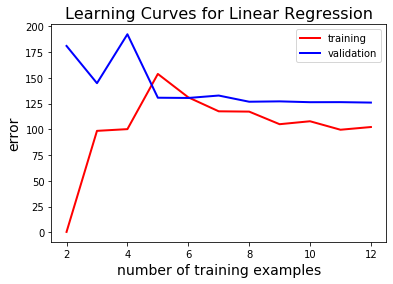

In [8]:
X_val = insert_ones(x_val)
Y_val = y_val.reshape(len(y_val), 1)

plt.title("Learning Curves for Linear Regression", fontsize=16)
learning_curves(X_train, Y_train, X_val, Y_val, 0.00001)

As expected, **linear regression** is unable to sufficiently decrease either the training or the validation error.

## Linear Regression with Linear Correlation

For **comparison**, data which has a high correlation, has a **learning curve** which diverges to a low error for **training** and **validation**

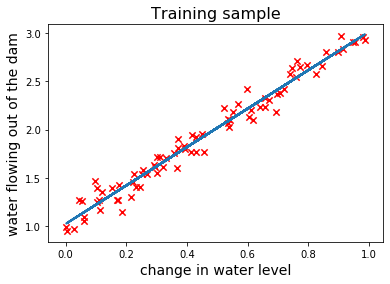

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Generation
x_lg = np.random.rand(100, 1)
y_lg = 1 + 2 * x_lg + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx_lg = np.arange(100)
np.random.shuffle(idx_lg)

# Uses first 80 random indices for train
train_idx_lg = idx_lg[:80]
# Uses the remaining indices for validation
val_idx_lg = idx_lg[80:]

# Generates train and validation sets
x_train_lg, y_train_lg = x_lg[train_idx_lg], y_lg[train_idx_lg]
x_val_lg, y_val_lg = x_lg[val_idx_lg], y_lg[val_idx_lg]

X_train_lg = insert_ones(x_train_lg)
Y_train_lg = y_train_lg.reshape(len(y_train_lg), 1)
theta_lg, cost_history_lg = train_linear_regression(X_train_lg, Y_train_lg, 0.05)     # learning rate = 0.05

hypothesis_lg = X_train_lg @ theta_lg

fig_lg, ax_lg = plt.subplots()
ax_lg.scatter(x_train_lg, y_train_lg, marker='x', s=40, c='red')
ax_lg.plot(X_train_lg[:, 1], hypothesis_lg, linewidth=2)
plt.xlabel('change in water level', fontsize=14)
plt.ylabel('water flowing out of the dam', fontsize=14)
plt.title('Training sample', fontsize=16);

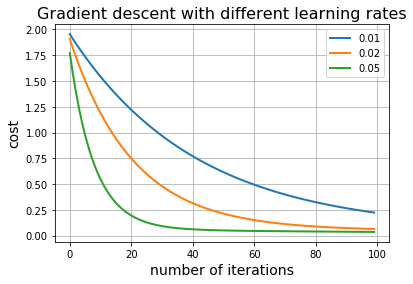

In [10]:
plt.figure()
num_iters = 100
learning_rates = [0.01, 0.02, 0.05]
for lr in learning_rates:
    _, cost_history = train_linear_regression(X_train_lg, Y_train_lg, lr, num_iters)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
plt.grid()

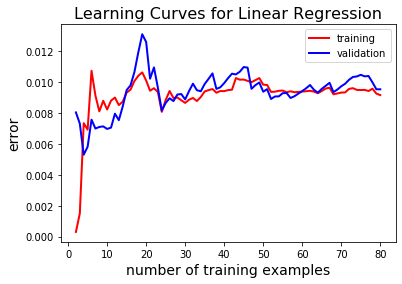

In [11]:
X_val_lg = insert_ones(x_val_lg)
Y_val_lg = y_val_lg.reshape(len(y_val_lg), 1)

plt.title("Learning Curves for Linear Regression", fontsize=16)
learning_curves(X_train_lg, Y_train_lg, X_val_lg, Y_val_lg, 0.01)

## Polynominal Regression

Given a **polynominal feature vector**

$$x = \begin{pmatrix}1 \\ x_1 \\ \vdots \\ x_n \end{pmatrix}$$

and **ploynominal model vector** $\theta$

$$\theta^\top = (\theta_0, \theta_1, \ldots, \theta_n)$$

then the **ploynominal hypothesis function** is

$$h_\theta(x)=\theta^\top x = \theta_0 + \theta_1 x_1 + \theta_2 x_2^2 + \ldots + \theta_n x_n^n$$

In order to train a **polynomial regression model**, the existing features have to be mapped to **artificially** generated polynomial features with $x_n^n = x_1^n$:

In [12]:
def poly_features(x, degree):
    X_poly = np.zeros(shape=(len(x), degree))
    for i in range(0, degree):
        X_poly[:, i] = x.squeeze() ** (i + 1);
    return X_poly

In [13]:
degree = 8

x_train_poly = poly_features(x_train, degree)
x_val_poly = poly_features(x_val, degree)
x_test_poly = poly_features(x_test, degree)

x_train_poly[:1, :]

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03,
         6.45059724e+04, -1.02801608e+06,  1.63832436e+07,
        -2.61095791e+08,  4.16102047e+09]])

The cost function will generally converge much more slowly when the features are imbalanced like this. So we need to make sure that our features are on a similar scale before we begin to train our model. We’re going to do this in two steps:

1. Subtract the mean value of each column from itself and make the new mean 0.
2. Divide the values in each column by their standard deviation and make the new standard deviation 1.

It’s important that we use the mean and standard deviation values from the **training sample** while normalizing the validation and test samples:

In [14]:
train_means = x_train_poly.mean(axis=0)
train_stdevs = np.std(x_train_poly, axis=0, ddof=1)

x_train_poly = (x_train_poly - train_means) / train_stdevs
x_val_poly = (x_val_poly - train_means) / train_stdevs
x_test_poly = (x_test_poly - train_means) / train_stdevs

X_train_poly = insert_ones(x_train_poly)
X_val_poly = insert_ones(x_val_poly)
X_test_poly = insert_ones(x_test_poly)

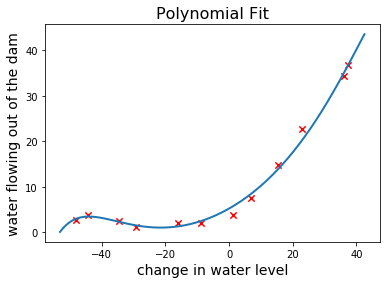

In [15]:
def plot_fit(min_x, max_x, means, stdevs, theta, degree):
    x = np.linspace(min_x - 5, max_x + 5, 1000)
    x_poly = poly_features(x, degree)
    x_poly = (x_poly - means) / stdevs
    x_poly = insert_ones(x_poly)
    plt.plot(x, x_poly @ theta, linewidth=2)

plt.scatter(x_train, y_train, marker="x", s=40, c='red')
plt.xlabel("change in water level", fontsize=14)
plt.ylabel("water flowing out of the dam", fontsize=14)
plt.title("Polynomial Fit", fontsize=16)

theta_poly, _ = train_linear_regression(X_train_poly, Y_train, 0.02, 2000)
plot_fit(min(x_train), max(x_train), train_means, train_stdevs, theta_poly, degree)

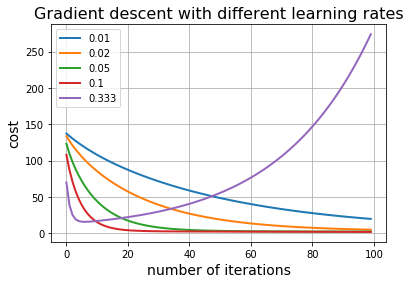

In [16]:
plt.figure()
learning_rates = [0.01, 0.02, 0.05, 0.1, 0.333]
for lr in learning_rates:
    _, cost_history = train_linear_regression(X_train_poly, Y_train, lr, 100)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
plt.grid()

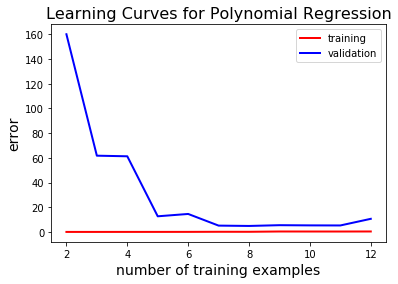

In [17]:
plt.title("Learning Curves for Polynomial Regression", fontsize=16)
learning_curves(X_train_poly, Y_train, X_val_poly, Y_val, 0.05)

## Polynominal Regression using SciPy

A more precisely fit is possible using `scipy.optimize.fmin_cg`:

In [18]:
import scipy.optimize as opt

def train_linear_regression_scipy(X, y):
    theta = np.zeros(X.shape[1])
    return opt.fmin_cg(cost, theta, cost_gradient, (X, y), disp=False)

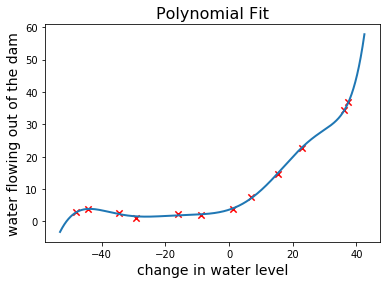

In [19]:
plt.scatter(x_train, y_train, marker="x", s=40, c='red')
plt.xlabel("change in water level", fontsize=14)
plt.ylabel("water flowing out of the dam", fontsize=14)
plt.title("Polynomial Fit", fontsize=16)

theta_poly = train_linear_regression_scipy(X_train_poly, y_train)
plot_fit(min(x_train), max(x_train), train_means, train_stdevs, theta_poly, degree)

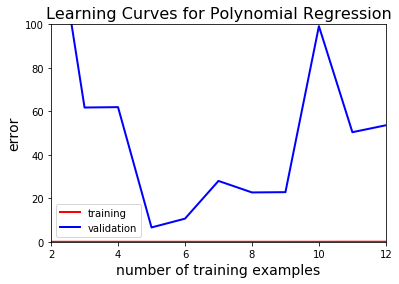

In [20]:
def learning_curves_scipy(X_train, y_train, X_val, y_val):
    train_err = np.zeros(len(y_train))
    val_err = np.zeros(len(y_train))
    for i in range(1, len(y_train)):
        theta = train_linear_regression_scipy(X_train[0:i + 1, :], y_train[0:i + 1])
        train_err[i] = cost(theta, X_train[0:i + 1, :], y_train[0:i + 1])
        val_err[i] = cost(theta, X_val, y_val)
    plt.plot(range(2, len(y_train) + 1), train_err[1:], c="r", linewidth=2)
    plt.plot(range(2, len(y_train) + 1), val_err[1:], c="b", linewidth=2)
    plt.xlabel("number of training examples", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["training", "validation"], loc="best")
    plt.axis([2, len(y_train), 0, 100])

plt.title("Learning Curves for Polynomial Regression", fontsize=16)
learning_curves_scipy(X_train_poly, y_train, X_val_poly, y_val)

THis shows a high **overfitting**. Even though the training error is very low, the validation error fails to converge.